# Data Analysis with Python (IBM)
## Módulo 4

## 1. Model Development

In [ ]:
#Importando la librería pandas
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
url ='https://raw.githubusercontent.com/tec03/Datasets/main/datasets/Cereals.csv'
input = pd.read_csv(url)

In [ ]:
df = input.copy()
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


In [ ]:
#Se eliminan todas las observaciones con datos faltantes, ya que no considero que sean muchos
df.dropna(inplace = True)
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
5,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


###Simple and multiple linear regression (SLR/MLR)
###Simple Regression: Una variable a predecir (y) y un solo predictor (x) y=b0+b1x
###Simple Regression: Una variable a predecir (y) y dos o más predictores (x1,x2,x3,...,xn) y=b0+b1x1+b2x2+b3x3+...+bnxn

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
#Simple Linear Regression
Y = df[['calories']]
X = df[['sodium']]
lm.fit(X,Y)

LinearRegression()

In [ ]:
#Predicciones
Yhat = lm.predict(X)

In [ ]:
lm.intercept_

array([95.49510278])

In [ ]:
lm.coef_

array([[0.07102475]])

**La relación entre el sodio y las calorias es:**

**Calorias = 95.5 + 0.08*(sodio)**

In [ ]:
#Aquí van las variables predictoras
Z = df[['sodium', 'fiber', 'carbo', 'sugars']]

In [ ]:
lm.fit(Z,Y)

LinearRegression()

In [ ]:
Yhat = lm.predict(Z)

In [31]:
lm.intercept_

array([20.78082046])

In [32]:
lm.coef_

array([[0.00888375, 0.93323193, 3.62789179, 4.12705057]])

**La relación entre el sodio y las calorias es:**

**Calorias = 20.8 + 0.00*(sodio) + 0.93(fibre) + 3.63(carbo) + 4.13(sugars)**

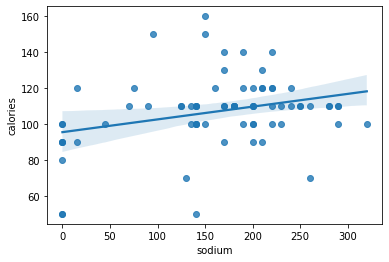

In [34]:
#Model evaluation using visualization
sns.regplot(x='sodium',y='calories', data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


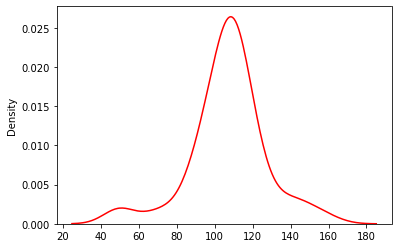

In [46]:
ax1 = sns.distplot(Y, hist=False, color="r", label='Valor actual')

In [47]:
sns.distplot(Yhat, hist=False, color ='b', label='Valores calculados', ax=ax1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


In [ ]:
#Polynomial Regression and Pipelines

In [ ]:
#R-squared and MSE for in sample evaluation

In [ ]:
#Prediction and decision making